In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

## z-scores for SNV density and singleton density, and overlap with various features (enhancers, exons, etc) 

Chen et al paper is at: 
https://github.com/quinlan-lab/constraint-tools/tree/main/literature/germline/chen%20et%20al%202022

I used the following notebook to merge the chen zscores with the mchale zscores computed on the Chen windows:
```
experiments/germline-model/chen-et-al-2022/merge_chen_zscores_with_mchale_zscores.ipynb
```

I used the following script to show that GeneHancer enhancers are non-overlapping: 
```
experiments/germline-model/chen-et-al-2022/GeneHancer-enhancers-dont-overlap.sh
```

I used the following script to compute the number of bps of each Chen window that is covered by each feature:
```
experiments/germline-model/chen-et-al-2022/add-overlapAmounts.sh
```

writing the data to
```
/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.overlapAmounts.bed
```


In [2]:
CONSTRAINT_TOOLS_DATA = '/scratch/ucgd/lustre-work/quinlan/data-shared/constraint-tools'

In [3]:
import pandas as pd 

def get_chen_mchale_features():
    filename = f'{CONSTRAINT_TOOLS_DATA}/benchmark-genome-wide-predictions/chen-et-al-2022/chen-mchale.overlapAmounts.bed'
    df = pd.read_csv(filename, sep='\t')
    df = df.rename(columns = {
        'chen_zscore': 'chen zscore',
    })
    return df

chen_mchale_zscores_features = get_chen_mchale_features()
chen_mchale_zscores_features

,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,chen zscore,feature,feature_chromosome,feature_start,feature_end,window_feature_overlap_bps
0,chr1,1432000,1433000,1432500,-0.302927,259,-1.9542069179816122,109,256,2.384293,enhancer,chr1,1428218,1438733,1000
1,chr1,1435000,1436000,1435500,-6.480015,273,1.0063653866562718,147,270,-2.952197,enhancer,chr1,1428218,1438733,1000
2,chr1,1435000,1436000,1435500,-6.480015,273,1.0063653866562718,147,270,-2.952197,merged_exon,chr1,1434861,1435146,146
3,chr1,1435000,1436000,1435500,-6.480015,273,1.0063653866562718,147,270,-2.952197,merged_exon,chr1,1435523,1435821,298
4,chr1,1449000,1450000,1449500,0.375665,225,-0.40292018202864255,113,223,-0.899126,merged_exon,chr1,1449689,1450758,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001165,chr22,50227000,50228000,50227500,1.186683,279,-1.8113689783770324,119,279,-2.528842,merged_exon,chr22,50227907,50228028,93
2001166,chr22,50228000,50229000,50228500,-0.330440,238,0.09272271004257816,119,226,1.302929,enhancer,chr22,50228803,50228983,180
2001167,chr22,50228000,50229000,50228500,-0.330440,238,0.09272271004257816,119,226,1.302929,merged_exon,chr22,50227907,50228028,28
2001168,chr22,50229000,50230000,50229500,-1.182980,230,0.023455488221183544,120,230,-3.331737,merged_exon,chr22,50229404,50229577,173


## Assess how often windows are overlapped by multiple features of the same type

In [4]:
chen_mchale_zscores_features['feature'].unique()

array(['enhancer', 'merged_exon', '.', 'uncovered_region',
       'merged_encode_exclude_region', 'merged_gap'], dtype=object)

In [5]:
def show_windows_with_multiple_overlaps(feature): 
    df = chen_mchale_zscores_features
    df = df[df['feature'] == feature]
    print(f'Here are the windows that overlap multiple {feature}s:') 
    return df[df.duplicated(
            subset = ['chromosome', 'start'], 
            keep = False # Mark all duplicates as True.
    )]

show_windows_with_multiple_overlaps('enhancer')

Here are the windows that overlap multiple enhancers:


,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,chen zscore,feature,feature_chromosome,feature_start,feature_end,window_feature_overlap_bps
72,chr1,1542000,1543000,1542500,0.274109,288,-0.22608601743246992,142,288,-2.630366,enhancer,chr1,1542001,1542200,199
73,chr1,1542000,1543000,1542500,0.274109,288,-0.22608601743246992,142,288,-2.630366,enhancer,chr1,1542870,1544200,130
98,chr1,1576000,1577000,1576500,-3.743241,164,0.04515996617755827,89,164,1.340653,enhancer,chr1,1573000,1576201,201
99,chr1,1576000,1577000,1576500,-3.743241,164,0.04515996617755827,89,164,1.340653,enhancer,chr1,1576221,1576370,149
109,chr1,1598000,1599000,1598500,-1.273968,257,2.0414022656310724,153,257,-4.106163,enhancer,chr1,1596901,1598401,401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001097,chr22,50089000,50090000,50089500,-2.379094,232,0.8736467153003352,129,232,0.921774,enhancer,chr22,50089957,50090016,43
2001108,chr22,50102000,50103000,50102500,0.695360,221,-0.43240250426500443,112,221,-3.189693,enhancer,chr22,50102801,50104558,199
2001109,chr22,50102000,50103000,50102500,0.695360,221,-0.43240250426500443,112,221,-3.189693,enhancer,chr22,50101400,50102400,400
2001139,chr22,50140000,50141000,50140500,0.342215,219,1.8022705781780808,131,219,-1.781400,enhancer,chr22,50139678,50140404,404


In [6]:
show_windows_with_multiple_overlaps('merged_exon')

Here are the windows that overlap multiple merged_exons:


,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,chen zscore,feature,feature_chromosome,feature_start,feature_end,window_feature_overlap_bps
2,chr1,1435000,1436000,1435500,-6.480015,273,1.0063653866562718,147,270,-2.952197,merged_exon,chr1,1434861,1435146,146
3,chr1,1435000,1436000,1435500,-6.480015,273,1.0063653866562718,147,270,-2.952197,merged_exon,chr1,1435523,1435821,298
24,chr1,1482000,1483000,1482500,5.199109,357,-2.321329114225284,141,357,-4.437469,merged_exon,chr1,1482138,1482303,165
25,chr1,1482000,1483000,1482500,5.199109,357,-2.321329114225284,141,357,-4.437469,merged_exon,chr1,1482545,1482662,117
27,chr1,1485000,1486000,1485500,6.981240,393,-2.728200380861117,152,393,-3.973097,merged_exon,chr1,1483485,1485171,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001161,chr22,50224000,50225000,50224500,0.613568,253,0.7110962532414574,136,253,-5.828498,merged_exon,chr22,50222987,50224256,256
2001162,chr22,50224000,50225000,50224500,0.613568,253,0.7110962532414574,136,253,-5.828498,merged_exon,chr22,50224332,50224420,88
2001163,chr22,50224000,50225000,50224500,0.613568,253,0.7110962532414574,136,253,-5.828498,merged_exon,chr22,50224511,50224592,81
2001164,chr22,50227000,50228000,50227500,1.186683,279,-1.8113689783770324,119,279,-2.528842,merged_exon,chr22,50226999,50227077,77


## Create single record for each window, with overlap amounts for each feature type 

In [7]:
chen_mchale_zscores_features = chen_mchale_zscores_features.drop(['feature_chromosome', 'feature_start', 'feature_end'], axis=1)
chen_mchale_zscores_features

,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,chen zscore,feature,window_feature_overlap_bps
0,chr1,1432000,1433000,1432500,-0.302927,259,-1.9542069179816122,109,256,2.384293,enhancer,1000
1,chr1,1435000,1436000,1435500,-6.480015,273,1.0063653866562718,147,270,-2.952197,enhancer,1000
2,chr1,1435000,1436000,1435500,-6.480015,273,1.0063653866562718,147,270,-2.952197,merged_exon,146
3,chr1,1435000,1436000,1435500,-6.480015,273,1.0063653866562718,147,270,-2.952197,merged_exon,298
4,chr1,1449000,1450000,1449500,0.375665,225,-0.40292018202864255,113,223,-0.899126,merged_exon,311
...,...,...,...,...,...,...,...,...,...,...,...,...
2001165,chr22,50227000,50228000,50227500,1.186683,279,-1.8113689783770324,119,279,-2.528842,merged_exon,93
2001166,chr22,50228000,50229000,50228500,-0.330440,238,0.09272271004257816,119,226,1.302929,enhancer,180
2001167,chr22,50228000,50229000,50228500,-0.330440,238,0.09272271004257816,119,226,1.302929,merged_exon,28
2001168,chr22,50229000,50230000,50229500,-1.182980,230,0.023455488221183544,120,230,-3.331737,merged_exon,173


In [8]:
columns_to_group_by = [column for column in chen_mchale_zscores_features.columns if column != 'window_feature_overlap_bps']
columns_to_group_by

['chromosome',
 'start',
 'end',
 'position',
 'N_bar',
 'N_observed',
 'K_bar',
 'K_observed',
 'M',
 'chen zscore',
 'feature']

In [9]:
chen_mchale_zscores_features = ( 
    chen_mchale_zscores_features
    .groupby(columns_to_group_by)
    .agg({'window_feature_overlap_bps': 'sum'})
)
chen_mchale_zscores_features

window_feature_overlap_bps
chromosome start     end       position  N_bar     N_observed K_bar                K_observed M   chen zscore feature                                
chr1       1432000   1433000   1432500   -0.302927 259        -1.9542069179816122  109        256  2.384293   enhancer                           1000
           1435000   1436000   1435500   -6.480015 273        1.0063653866562718   147        270 -2.952197   enhancer                           1000
                                                                                                              merged_exon                         444
           1449000   1450000   1449500    0.375665 225        -0.40292018202864255 113        223 -0.899126   merged_exon                         311
           1450000   1451000   1450500    2.604670 312        -3.4160133802925     109        307 -5.461776   merged_exon                         758
...                                                                                                                                               ...
chr9       137282000 137283000 137282500 -1.537782 210        -0.33350277418097046 108        210 -1.325061   enhancer                            572
                                                                                                              merged_exon                         641
           137290000 137291000 137290500 -0.097785 223        -1.182282731197813   106        223  2.257853   .                                     0
           137294000 137295000 137294500 -5.355165 180        -0.7747279659290897  91         180  2.594305   enhancer                           1000
                                                                                                              merged_exon                        1000

[1917155 rows x 1 columns]

In [10]:
pivot_index = [column for column in columns_to_group_by if column != 'feature']
pivot_index 

['chromosome',
 'start',
 'end',
 'position',
 'N_bar',
 'N_observed',
 'K_bar',
 'K_observed',
 'M',
 'chen zscore']

In [11]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
# pivoting is possible in SQL too, but it is clunky: https://www.databricks.com/blog/2018/11/01/sql-pivot-converting-rows-to-columns.html
chen_mchale_zscores_features = (
    chen_mchale_zscores_features
    .reset_index()
    .pivot(
        index = pivot_index, 
        columns = "feature", 
        values = "window_feature_overlap_bps"
    )
    .drop(['.'], axis=1)
    .add_suffix(' overlap')
    .reset_index()
)
chen_mchale_zscores_features.columns.name = None
chen_mchale_zscores_features

,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,chen zscore,enhancer overlap,merged_encode_exclude_region overlap,merged_exon overlap,merged_gap overlap,uncovered_region overlap
0,chr1,1432000,1433000,1432500,-0.302927,259,-1.9542069179816122,109,256,2.384293,1000.0,NaN,NaN,NaN,NaN
1,chr1,1435000,1436000,1435500,-6.480015,273,1.0063653866562718,147,270,-2.952197,1000.0,NaN,444.0,NaN,NaN
2,chr1,1449000,1450000,1449500,0.375665,225,-0.40292018202864255,113,223,-0.899126,NaN,NaN,311.0,NaN,NaN
3,chr1,1450000,1451000,1450500,2.604670,312,-3.4160133802925,109,307,-5.461776,NaN,NaN,758.0,NaN,NaN
4,chr1,1451000,1452000,1451500,2.948512,291,-1.3173308655803435,129,291,-1.497436,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796995,chr9,137269000,137270000,137269500,-2.991450,209,-0.7858373648267517,104,209,-2.101905,1000.0,NaN,NaN,NaN,NaN
1796996,chr9,137275000,137276000,137275500,1.895573,290,-2.4094675113595323,117,290,-8.124844,712.0,NaN,NaN,NaN,NaN
1796997,chr9,137282000,137283000,137282500,-1.537782,210,-0.33350277418097046,108,210,-1.325061,572.0,NaN,641.0,NaN,NaN
1796998,chr9,137290000,137291000,137290500,-0.097785,223,-1.182282731197813,106,223,2.257853,NaN,NaN,NaN,NaN,NaN


In [12]:
# Note: the groupby followed by pivot strategy, implemented above,
# could be achieved in one step using pivot tables: 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#pivoting-with-single-aggregations

In [13]:
chen_mchale_zscores_features['K_bar'] = pd.to_numeric(chen_mchale_zscores_features['K_bar'], errors='coerce') # convert '.' to 'NaN'
chen_mchale_zscores_features = chen_mchale_zscores_features.dropna(subset=['K_bar']) # drop windows for which K_bar == NaN
chen_mchale_zscores_features.describe()

,start,end,position,N_bar,N_observed,K_bar,K_observed,M,chen zscore,enhancer overlap,merged_encode_exclude_region overlap,merged_exon overlap,merged_gap overlap,uncovered_region overlap
count,1.795212e+06,1.795212e+06,1.795212e+06,1.795212e+06,1.795212e+06,1.795212e+06,1.795212e+06,1.795212e+06,1.795212e+06,596243.000000,570.000000,259824.000000,1.0,4004.000000
mean,8.147502e+07,8.147602e+07,8.147552e+07,-2.089127e-01,2.007691e+02,-1.850696e-02,1.055528e+02,1.997534e+02,-5.934307e-01,679.379719,298.335088,377.468032,304.0,71.798951
std,5.514515e+07,5.514515e+07,5.514515e+07,2.289190e+00,3.163123e+01,9.928224e-01,1.663814e+01,3.133720e+01,2.114984e+00,326.461437,157.761143,331.941805,NaN,52.971212
min,5.220000e+05,5.230000e+05,5.225000e+05,-1.692947e+01,1.270000e+02,-5.220967e+00,5.000000e+01,1.270000e+02,-9.999583e+00,0.000000,1.000000,1.000000,304.0,1.000000
25%,3.656475e+07,3.656575e+07,3.656525e+07,-1.651163e+00,1.800000e+02,-6.806389e-01,9.400000e+01,1.800000e+02,-1.756193e+00,399.000000,173.250000,115.000000,304.0,43.000000
50%,7.262400e+07,7.262500e+07,7.262450e+07,-5.187761e-01,1.960000e+02,-9.179449e-03,1.040000e+02,1.950000e+02,-4.507339e-01,798.000000,345.500000,233.000000,304.0,60.000000
75%,1.161260e+08,1.161270e+08,1.161265e+08,8.130759e-01,2.140000e+02,6.597655e-01,1.140000e+02,2.130000e+02,7.593585e-01,1000.000000,384.000000,596.000000,304.0,88.000000
max,2.484140e+08,2.484150e+08,2.484145e+08,2.372282e+01,5.580000e+02,4.590955e+00,2.460000e+02,4.350000e+02,9.924837e+00,1000.000000,652.000000,1000.000000,304.0,563.000000


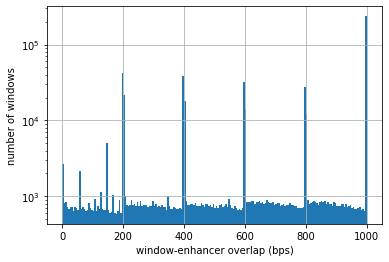

In [14]:
import numpy as np 

def plot_distribution_of_overlap_amounts(feature): 
    axis = chen_mchale_zscores_features[f'{feature} overlap'].hist(bins=200)
    axis.set_yscale('log')
    axis.set_xlabel(f'window-{feature} overlap (bps)')
    axis.set_ylabel('number of windows')
    
# Notice that there are peaks in the distribution at multiples of 200bp.
# These correspond to starts and ends of certain enhancers, 
# presumably those called from a low-resolution tiling approach.
# The other category of enhancer has greater spatial resolution, 
# resulting in a uniform distribution of bp coverage, 
# as you might expect from features that are comparable in size to the windows 
plot_distribution_of_overlap_amounts(feature='enhancer')

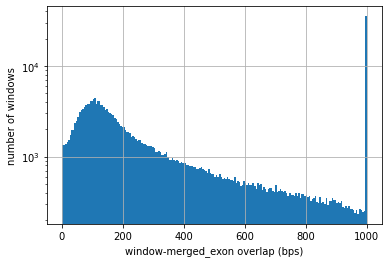

In [15]:
# Notice that the distribution is not uniform. 
# This is because exons are typically smaller than windows, 
# so that the overlap amounts reflect the exon sizes, 
# which are typically < 200bp 
plot_distribution_of_overlap_amounts(feature='merged_exon')

## Throw out non-trustworthy windows, and classify the remainder according to whether they appreciably overlap enhancers or exons 

In [16]:
def classify(df, feature, min_overlap): 
    def overlaps_enhancer(overlap): 
        if pd.isna(overlap): 
            return False
        if overlap > min_overlap: 
            return True 
        return 'ambiguous'

    df[f'window overlaps {feature}'] = df[f'{feature} overlap'].apply(overlaps_enhancer)
    return df
    
def classify_all(df): 
    for feature, min_overlap in [
        ('enhancer', 10),
        ('merged_encode_exclude_region', 0),
        ('merged_exon', 5),
        ('merged_gap', 0),
        ('uncovered_region', 0),
    ]:
        df = classify(df, feature, min_overlap)
    return df 

chen_mchale_zscores_features = classify_all(chen_mchale_zscores_features)
chen_mchale_zscores_features 

<ipython-input-16-b15f83d9f5e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'window overlaps {feature}'] = df[f'{feature} overlap'].apply(overlaps_enhancer)


,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,chen zscore,enhancer overlap,merged_encode_exclude_region overlap,merged_exon overlap,merged_gap overlap,uncovered_region overlap,window overlaps enhancer,window overlaps merged_encode_exclude_region,window overlaps merged_exon,window overlaps merged_gap,window overlaps uncovered_region
0,chr1,1432000,1433000,1432500,-0.302927,259,-1.954207,109,256,2.384293,1000.0,NaN,NaN,NaN,NaN,True,False,False,False,False
1,chr1,1435000,1436000,1435500,-6.480015,273,1.006365,147,270,-2.952197,1000.0,NaN,444.0,NaN,NaN,True,False,True,False,False
2,chr1,1449000,1450000,1449500,0.375665,225,-0.402920,113,223,-0.899126,NaN,NaN,311.0,NaN,NaN,False,False,True,False,False
3,chr1,1450000,1451000,1450500,2.604670,312,-3.416013,109,307,-5.461776,NaN,NaN,758.0,NaN,NaN,False,False,True,False,False
4,chr1,1451000,1452000,1451500,2.948512,291,-1.317331,129,291,-1.497436,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796995,chr9,137269000,137270000,137269500,-2.991450,209,-0.785837,104,209,-2.101905,1000.0,NaN,NaN,NaN,NaN,True,False,False,False,False
1796996,chr9,137275000,137276000,137275500,1.895573,290,-2.409468,117,290,-8.124844,712.0,NaN,NaN,NaN,NaN,True,False,False,False,False
1796997,chr9,137282000,137283000,137282500,-1.537782,210,-0.333503,108,210,-1.325061,572.0,NaN,641.0,NaN,NaN,True,False,True,False,False
1796998,chr9,137290000,137291000,137290500,-0.097785,223,-1.182283,106,223,2.257853,NaN,NaN,NaN,NaN,NaN,False,False,False,False,False


In [17]:
def throw_out_untrustworthy(df): 
    throw_out = df[[
        'window overlaps merged_encode_exclude_region',
        'window overlaps merged_gap',
        'window overlaps uncovered_region'
    ]].any(axis='columns')
    keep = ~throw_out
    return (
        df[keep]
        .drop([
            'merged_encode_exclude_region overlap',
            'merged_gap overlap',
            'uncovered_region overlap',
            'window overlaps merged_encode_exclude_region',
            'window overlaps merged_gap',
            'window overlaps uncovered_region'
        ], axis=1)
    )

def throw_out_ambiguous(df):
    throw_out = (
        df[[
            'window overlaps enhancer',
            'window overlaps merged_exon',
        ]]
        .isin(['ambiguous'])
        .any(axis=1)
    )
    keep = ~throw_out
    return (
        df[keep]
        .astype({
            'window overlaps enhancer': bool,
            'window overlaps merged_exon': bool,
        })
    )

def filter_windows(df): 
    df = throw_out_untrustworthy(df)
    df = throw_out_ambiguous(df)
    return df 

chen_mchale_zscores_features = filter_windows(chen_mchale_zscores_features)
chen_mchale_zscores_features

,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,chen zscore,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon
0,chr1,1432000,1433000,1432500,-0.302927,259,-1.954207,109,256,2.384293,1000.0,NaN,True,False
1,chr1,1435000,1436000,1435500,-6.480015,273,1.006365,147,270,-2.952197,1000.0,444.0,True,True
2,chr1,1449000,1450000,1449500,0.375665,225,-0.402920,113,223,-0.899126,NaN,311.0,False,True
3,chr1,1450000,1451000,1450500,2.604670,312,-3.416013,109,307,-5.461776,NaN,758.0,False,True
4,chr1,1451000,1452000,1451500,2.948512,291,-1.317331,129,291,-1.497436,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796995,chr9,137269000,137270000,137269500,-2.991450,209,-0.785837,104,209,-2.101905,1000.0,NaN,True,False
1796996,chr9,137275000,137276000,137275500,1.895573,290,-2.409468,117,290,-8.124844,712.0,NaN,True,False
1796997,chr9,137282000,137283000,137282500,-1.537782,210,-0.333503,108,210,-1.325061,572.0,641.0,True,True
1796998,chr9,137290000,137291000,137290500,-0.097785,223,-1.182283,106,223,2.257853,NaN,NaN,False,False


In [18]:
def joint_classify(df): 
    new_column = 'window overlaps (enhancer, merged_exon)'
    df[new_column] = list(zip(df['window overlaps enhancer'], df['window overlaps merged_exon'])) 

    from pandas.api.types import CategoricalDtype    
    category_type = CategoricalDtype(categories=[(False, False), (True, False), (False, True), (True, True)], ordered=True)
    df[new_column] = df[new_column].astype(category_type)
    
#     df = df.drop(['window overlaps enhancer', 'window overlaps merged_exon'], axis=1)

    return df

chen_mchale_zscores_features = joint_classify(chen_mchale_zscores_features)
chen_mchale_zscores_features

,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,chen zscore,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon,"window overlaps (enhancer, merged_exon)"
0,chr1,1432000,1433000,1432500,-0.302927,259,-1.954207,109,256,2.384293,1000.0,NaN,True,False,"(True, False)"
1,chr1,1435000,1436000,1435500,-6.480015,273,1.006365,147,270,-2.952197,1000.0,444.0,True,True,"(True, True)"
2,chr1,1449000,1450000,1449500,0.375665,225,-0.402920,113,223,-0.899126,NaN,311.0,False,True,"(False, True)"
3,chr1,1450000,1451000,1450500,2.604670,312,-3.416013,109,307,-5.461776,NaN,758.0,False,True,"(False, True)"
4,chr1,1451000,1452000,1451500,2.948512,291,-1.317331,129,291,-1.497436,NaN,NaN,False,False,"(False, False)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796995,chr9,137269000,137270000,137269500,-2.991450,209,-0.785837,104,209,-2.101905,1000.0,NaN,True,False,"(True, False)"
1796996,chr9,137275000,137276000,137275500,1.895573,290,-2.409468,117,290,-8.124844,712.0,NaN,True,False,"(True, False)"
1796997,chr9,137282000,137283000,137282500,-1.537782,210,-0.333503,108,210,-1.325061,572.0,641.0,True,True,"(True, True)"
1796998,chr9,137290000,137291000,137290500,-0.097785,223,-1.182283,106,223,2.257853,NaN,NaN,False,False,"(False, False)"


## Exons are predicted to be more constrained than enhancers under both Chen and McHale models, but McHale's model is "best" at differentiating windows that overlap both enhancers and exons

In [19]:
chen_mchale_zscores_features['negative chen zscore'] = -chen_mchale_zscores_features['chen zscore']

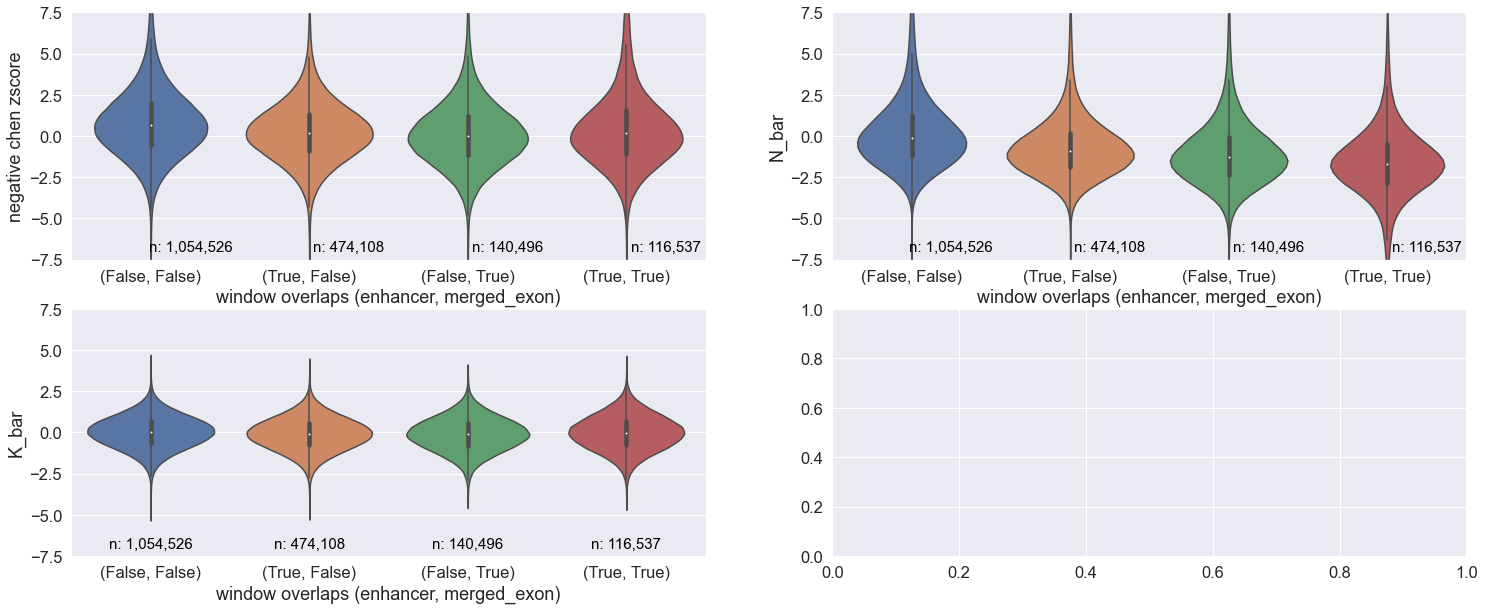

In [20]:
import seaborn as sns
sns.set(font_scale = 1.5)

import matplotlib.pyplot as plt 

def display_number_observations(ax, x_offset, y): 
    number_observations_per_group = chen_mchale_zscores_features['window overlaps (enhancer, merged_exon)'].value_counts().values
    number_observations_per_group = [f'n: {count:,}' for count in number_observations_per_group]

    for index, count in enumerate(number_observations_per_group): 
        ax.text(
            index + x_offset, 
            y, 
            count,
            horizontalalignment = 'center',
            size = 'small',
            color = 'black',
#             weight = 'semibold'
        )

fig, axs = plt.subplots(2, 2, figsize=(25,10))

for j, y in enumerate(['negative chen zscore', 'N_bar']):
    sns.violinplot(
        data = chen_mchale_zscores_features, 
        y = y, 
        x = 'window overlaps (enhancer, merged_exon)',
        ax = axs[0, j],
        scale = "area" # each violin will have the same area
    )
    axs[0, j].set_ylim([-7.5, 7.5])
    display_number_observations(axs[0, j], 0.25, -7)

sns.violinplot(
    data = chen_mchale_zscores_features, 
    y = 'K_bar', 
    x = 'window overlaps (enhancer, merged_exon)',
    ax = axs[1, 0],
    scale = "area" # each violin will have the same area
)
axs[1, 0].set_ylim([-7.5, 7.5])
display_number_observations(axs[1, 0], 0, -7)
    

## The strongest signal for constraint (N_bar < 0 and K_bar > 0 or large singleton_proportion) occurs for a subset of windows that overlap both enhancers and exons 

In [21]:
chen_mchale_zscores_features['singleton proportion'] = chen_mchale_zscores_features['K_observed']/chen_mchale_zscores_features['M']

In [22]:
def compute_singleton_proportion_error(window): 
    p_hat = window['singleton proportion']
    m = window['M']
    return np.sqrt(p_hat*(1 - p_hat)/m)

chen_mchale_zscores_features['singleton proportion error (ind. sites)'] = chen_mchale_zscores_features.apply(
    compute_singleton_proportion_error, 
    axis = 1
)
chen_mchale_zscores_features

,chromosome,start,end,position,N_bar,N_observed,K_bar,K_observed,M,chen zscore,enhancer overlap,merged_exon overlap,window overlaps enhancer,window overlaps merged_exon,"window overlaps (enhancer, merged_exon)",negative chen zscore,singleton proportion,singleton proportion error (ind. sites)
0,chr1,1432000,1433000,1432500,-0.302927,259,-1.954207,109,256,2.384293,1000.0,NaN,True,False,"(True, False)",-2.384293,0.425781,0.030904
1,chr1,1435000,1436000,1435500,-6.480015,273,1.006365,147,270,-2.952197,1000.0,444.0,True,True,"(True, True)",2.952197,0.544444,0.030309
2,chr1,1449000,1450000,1449500,0.375665,225,-0.402920,113,223,-0.899126,NaN,311.0,False,True,"(False, True)",0.899126,0.506726,0.033479
3,chr1,1450000,1451000,1450500,2.604670,312,-3.416013,109,307,-5.461776,NaN,758.0,False,True,"(False, True)",5.461776,0.355049,0.027311
4,chr1,1451000,1452000,1451500,2.948512,291,-1.317331,129,291,-1.497436,NaN,NaN,False,False,"(False, False)",1.497436,0.443299,0.029121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796995,chr9,137269000,137270000,137269500,-2.991450,209,-0.785837,104,209,-2.101905,1000.0,NaN,True,False,"(True, False)",2.101905,0.497608,0.034585
1796996,chr9,137275000,137276000,137275500,1.895573,290,-2.409468,117,290,-8.124844,712.0,NaN,True,False,"(True, False)",8.124844,0.403448,0.028808
1796997,chr9,137282000,137283000,137282500,-1.537782,210,-0.333503,108,210,-1.325061,572.0,641.0,True,True,"(True, True)",1.325061,0.514286,0.034489
1796998,chr9,137290000,137291000,137290500,-0.097785,223,-1.182283,106,223,2.257853,NaN,NaN,False,False,"(False, False)",-2.257853,0.475336,0.033442


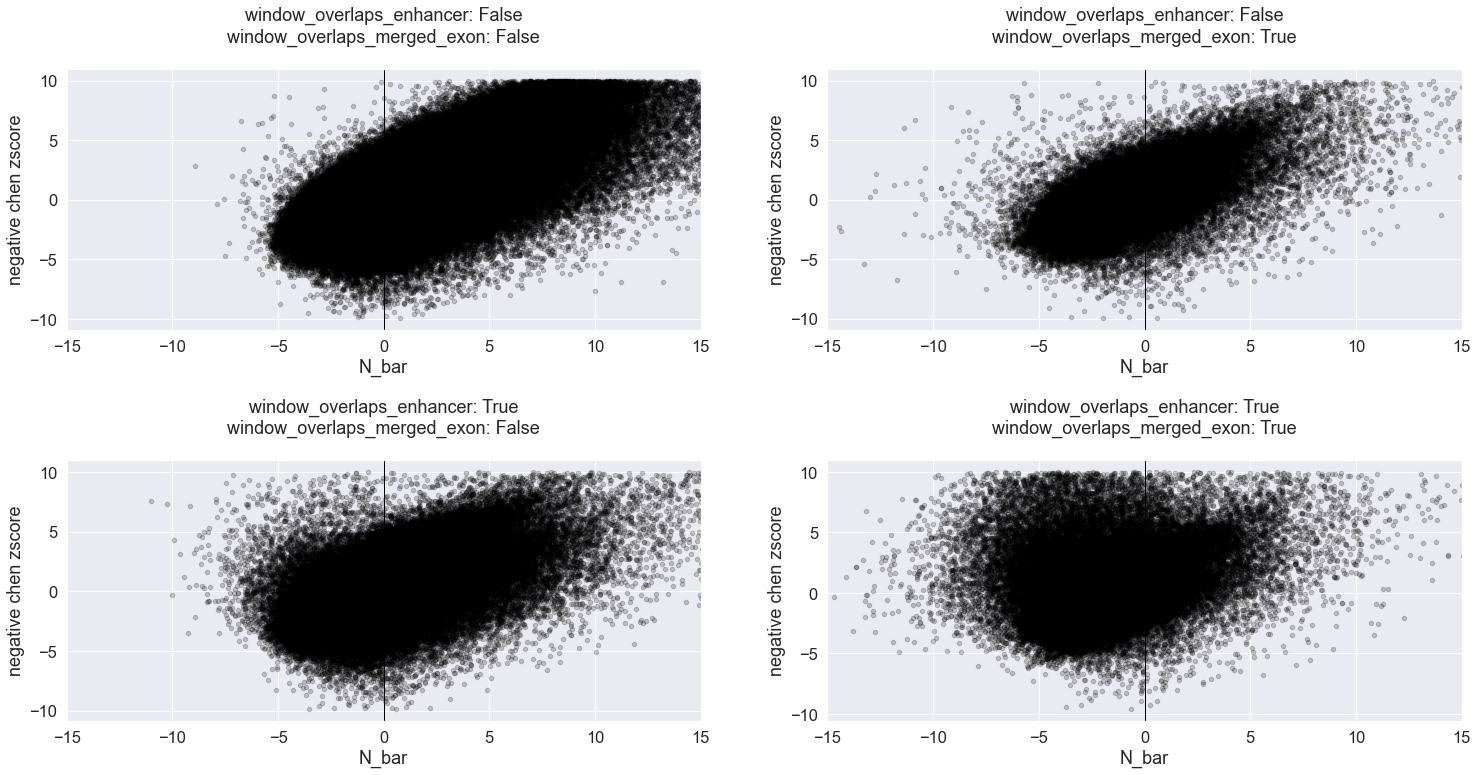

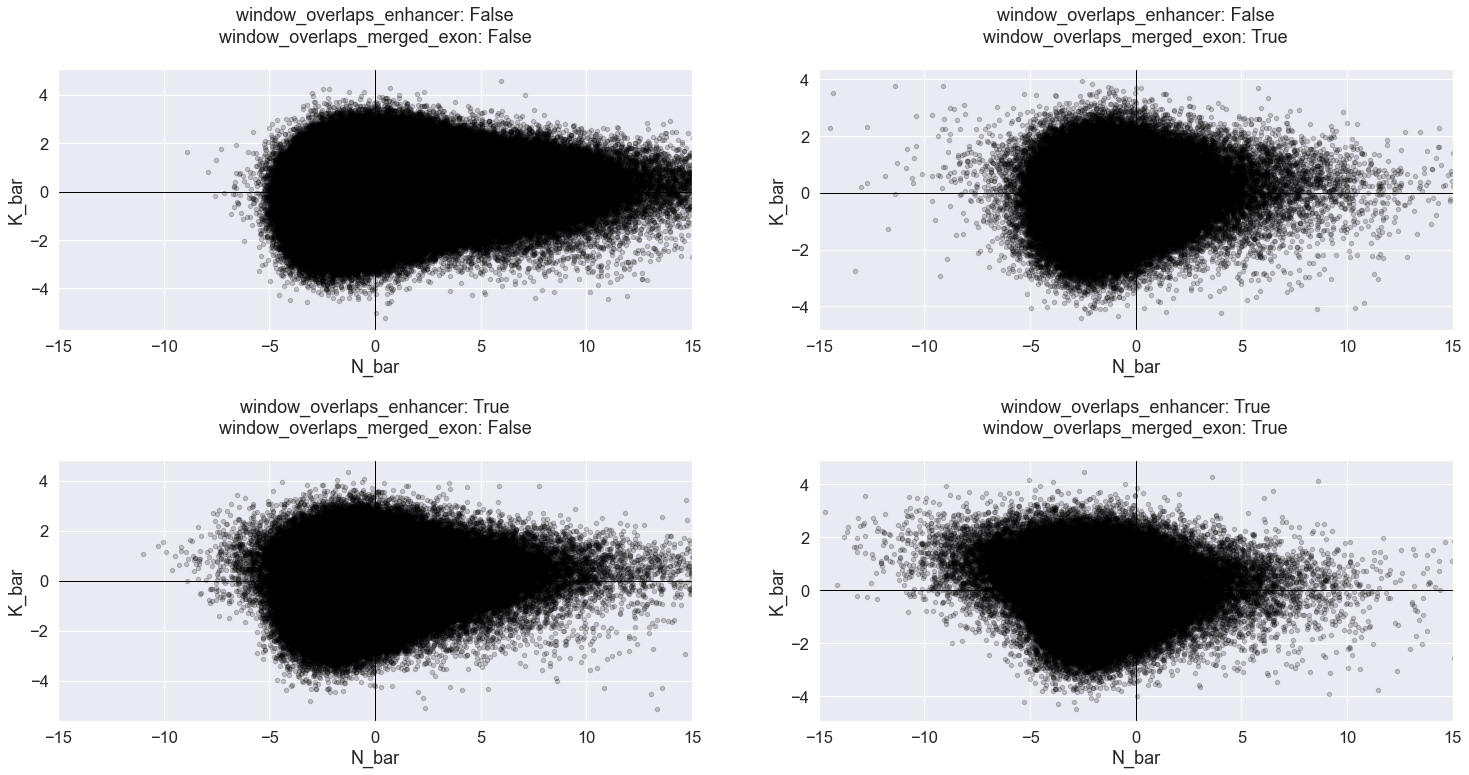

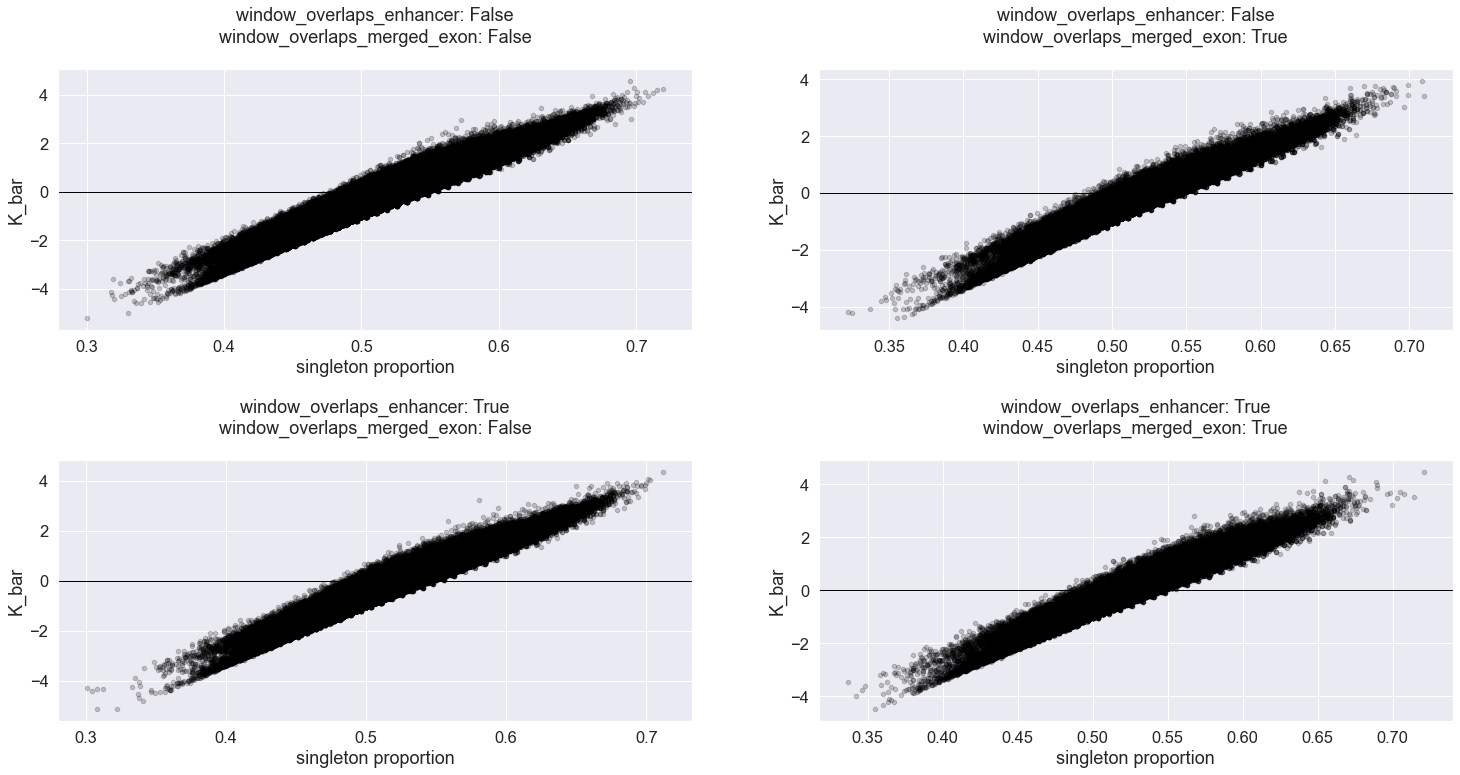

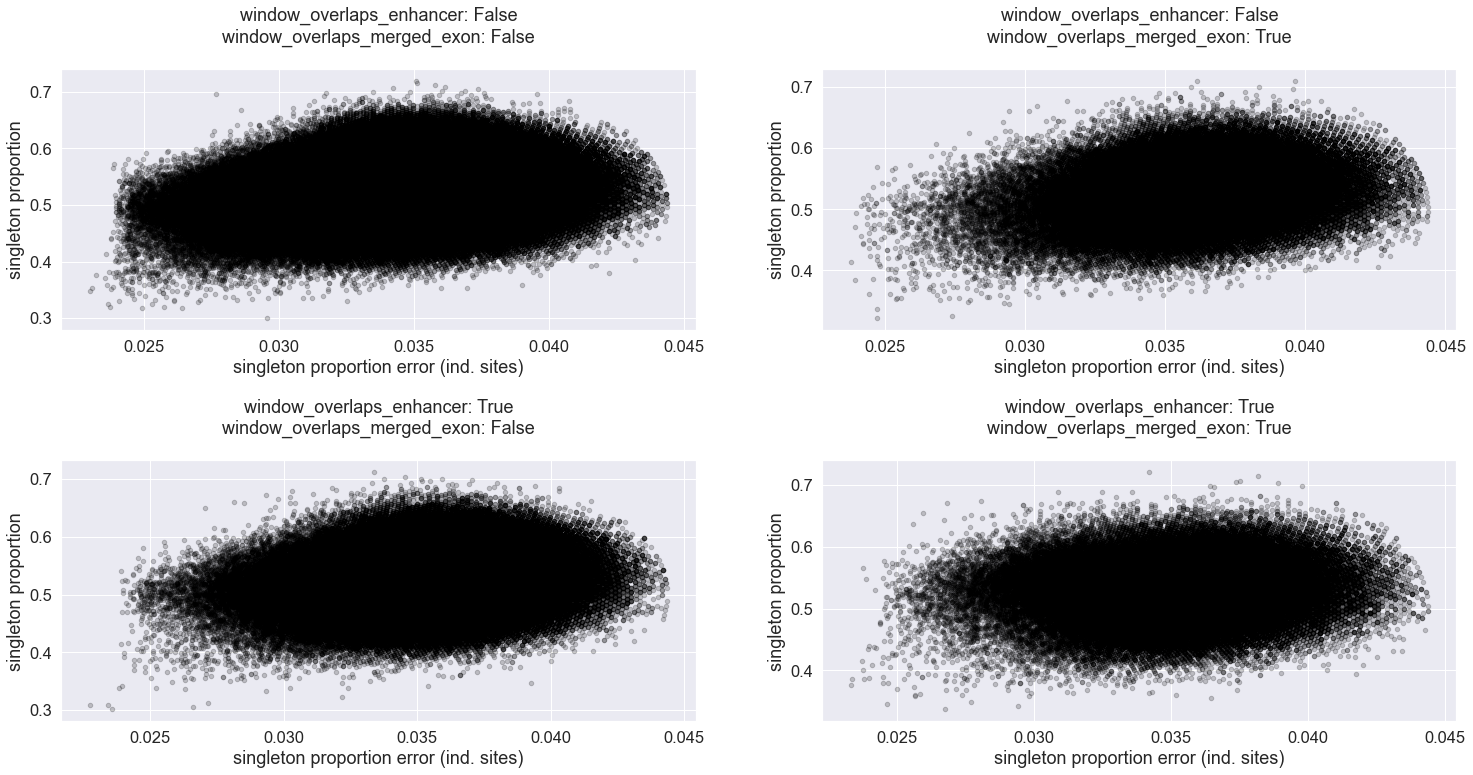

In [50]:
def scatter_plot(x, y, step_size=1): 
    df = chen_mchale_zscores_features.iloc[::step_size, :]
        
    fig, axs = plt.subplots(2, 2, figsize=(25,12))
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
    
    for i, window_overlaps_enhancer in enumerate([False, True]):
        for j, window_overlaps_merged_exon in enumerate([False, True]):
            axis = axs[i, j]
            filtered = df[
                (df['window overlaps enhancer'] == window_overlaps_enhancer) & 
                (df['window overlaps merged_exon'] == window_overlaps_merged_exon) 
            ]
            axis = filtered.plot.scatter(
                x = x,
                y = y,
                c = 'black',
                alpha = 0.2,
                ax = axis,
            )
            if (x != 'singleton proportion error (ind. sites)') and (x != 'singleton proportion'): 
                axis.set_xlim(-15, 15)
                axis.axvline(linewidth=1, color='black')
            if y == 'K_bar': axis.axhline(linewidth=1, color='black')
            title = (
                f'window_overlaps_enhancer: {window_overlaps_enhancer}\n'
                f'window_overlaps_merged_exon: {window_overlaps_merged_exon}\n'
            )
            if step_size > 1:
                title += f'downsampled {step_size}-fold'
            axis.set_title(title)

def scatter_plots(step_size = 1):
    scatter_plot(
        x = 'N_bar', 
        y = 'negative chen zscore',
        step_size = step_size
    )
    scatter_plot(
        x = 'N_bar', 
        y = 'K_bar',
        step_size = step_size
    )
    scatter_plot(
        x = 'singleton proportion', 
        y = 'K_bar',
        step_size = step_size
    )
    scatter_plot(
        x = 'singleton proportion error (ind. sites)', 
        y = 'singleton proportion',
        step_size = step_size
    )
    
# These plots show that there is a large enrichment for enhancers when N_bar < 0 and K_bar > 0.
# That K_bar > 0 inequality corresponds to an increase in the fraction of variants in each window that are singletons, 
# and is a significant result because the estimated error in computing the singleton proportion is smaller than the effect size. 
scatter_plots(step_size=1)

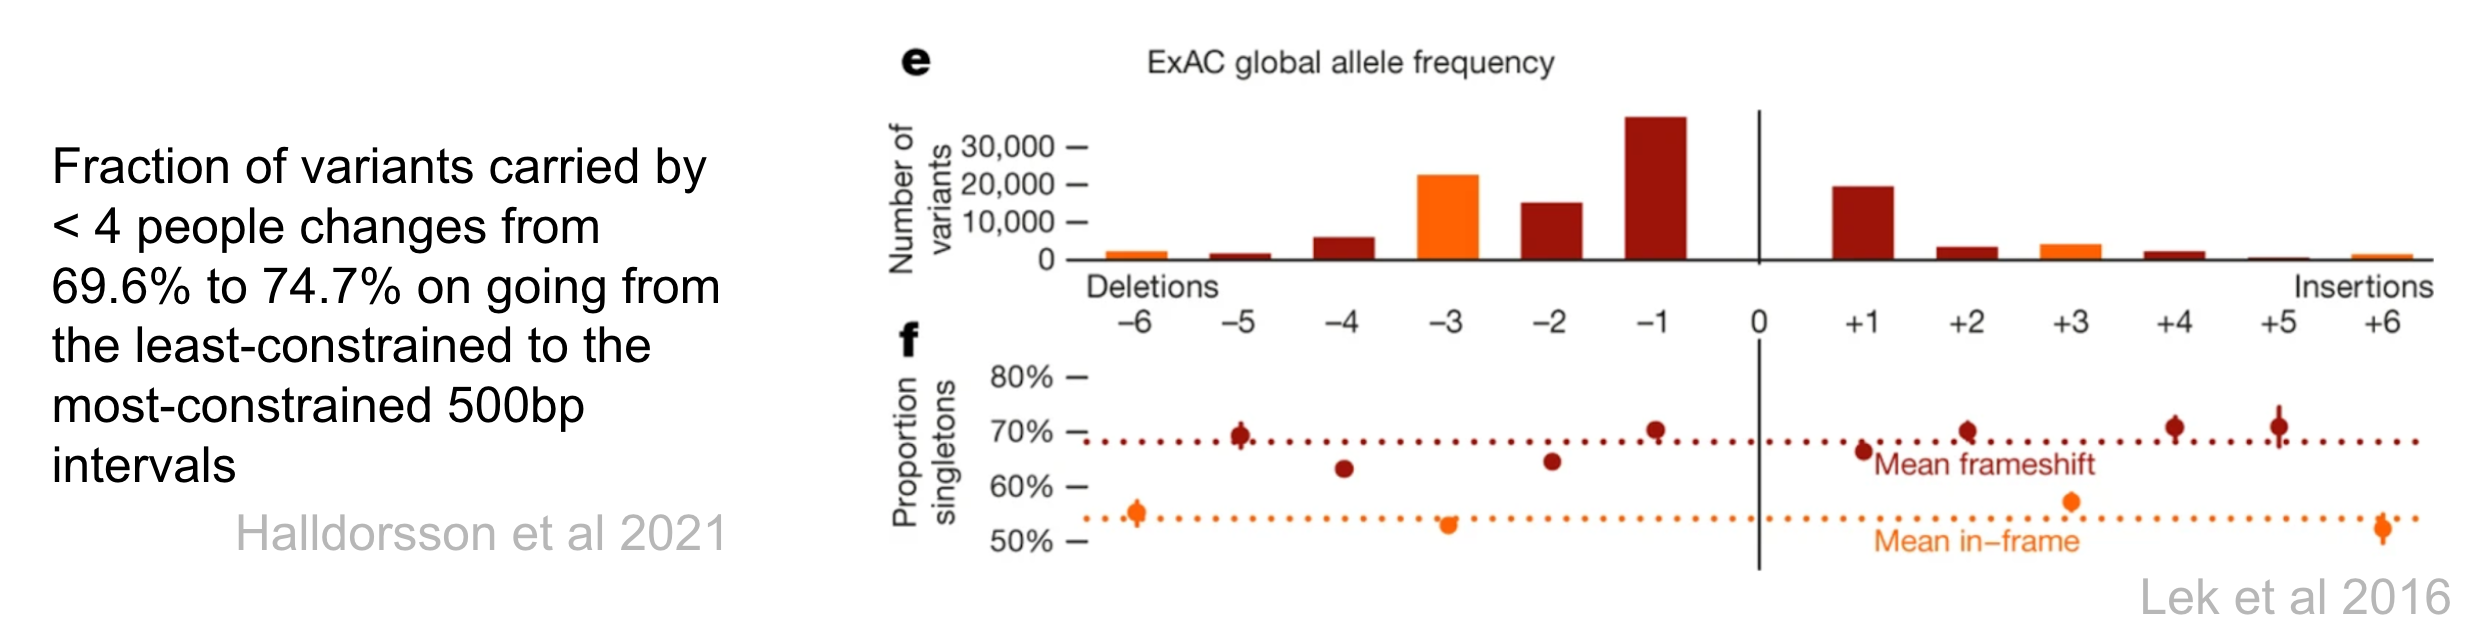

In [45]:
# The result that singleton proportion goes up in putatively constrained regions is consistent with earlier results: 

# embed raw image data in notebook: 
# https://github.com/microsoft/vscode-jupyter/issues/6437
from IPython.display import Image

Image(filename='singleton-proportion-is-high-in-constrained-regions.png', width=1000)

## CONTINUE FROM HERE: McHale's N_bar appears to explain more of the variance in enhancer fraction than Chen's zscore (c.f. Fig 2a of Chen et al 2022)

Note also the correlation between the z-scores, as demonstrated in 

```
experiments/germline-model/chen-et-al-2022/Fig_1a.ipynb 
```

In [ ]:
def compute_bins(number_bins, min_value=-5, max_value=5): 
    bin_width = (max_value - min_value)/number_bins
    bins = np.arange(min_value, max_value+0.5*bin_width, bin_width)
    return bins
    
def aggregate_2d(grouped_windows, x, y, z, aggregation_function): 
    aggregated = grouped_windows.agg({z["column"]: [aggregation_function]})
    aggregated.columns = [f'{z["column"]}_{aggregation_function}']
    aggregated = aggregated.reset_index()
    
    # pivot the data into a 2d array 
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
    aggregated = aggregated.pivot(index=f'{y["column"]} bin', columns=f'{x["column"]} bin', values=f'{z["column"]}_{aggregation_function}')
    
    return aggregated
    
def plot_heat_map(df, x, y, z, count_threshold, ax, heat_map_type): 
    # https://pandas.pydata.org/docs/reference/api/pandas.cut.html
    df[f'{x["column"]} bin'] = pd.cut(df[x['column']], bins=compute_bins(x['number_of_bins']))
    if y['column'] != 'singleton proportion':
        df[f'{y["column"]} bin'] = pd.cut(df[y['column']], bins=compute_bins(y['number_of_bins']))
    else: 
        df[f'{y["column"]} bin'] = pd.cut(df[y['column']], bins=compute_bins(y['number_of_bins'], min_value=0.3, max_value=0.8))

    grouped_windows = df.groupby([f'{x["column"]} bin', f'{y["column"]} bin'])
    
    sample_mean = aggregate_2d(grouped_windows, x, y, z, 'mean')
    sample_std = aggregate_2d(grouped_windows, x, y, z, 'std')
    
    sample_size = pd.DataFrame(grouped_windows.size())
    sample_size.columns = ['counts']
    sample_size = sample_size.reset_index()

    # pivot the data into a 2d array
    # https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-by-pivoting-dataframe-objects
    sample_size = sample_size.pivot(index=f'{y["column"]} bin', columns=f'{x["column"]} bin', values='counts')
    
    # https://en.wikipedia.org/wiki/Standard_error
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.divide.html
    standard_error_of_mean = sample_std / np.sqrt(sample_size)
    
    mask = sample_size < count_threshold

    if heat_map_type == 'GeneHancer enhancer enrichment':
        heat_map = sample_mean 
        heat_map_colorbar_label = z['GeneHancer enhancer enrichment label']
    elif heat_map_type == 'GeneHancer enhancer enrichment fractional error': 
        heat_map = standard_error_of_mean/sample_mean
        heat_map_colorbar_label = z['fractional error label']
    else:
        raise ValueError
        
    # https://seaborn.pydata.org/generated/seaborn.heatmap.html
    sns.heatmap(
        heat_map, 
        cmap = 'BrBG', 
        center = None, 
        annot = True, 
        fmt = '.3f', 
        linewidths = .5, 
        cbar_kws = {'label': heat_map_colorbar_label},
        ax = ax,
        mask = mask
    )
    ax.invert_yaxis()
       
def plot_heat_maps(x_number_of_bins, y_number_of_bins, y_column):
    # sns.set(rc = {'figure.figsize': (10, 8)})
    sns.set(font_scale = 1)

    with sns.axes_style("white"):        
        fig, axs = plt.subplots(1, 2, figsize=(25,5))
        for i, heat_map_type in enumerate(['GeneHancer enhancer enrichment', 'GeneHancer enhancer enrichment fractional error']):
            plot_heat_map(
                df = chen_mchale_zscores_GeneHancer_enhancers,
                x = {
                    'column': 'N_bar',
                    'number_of_bins': x_number_of_bins
                },
                y = { 
                    'column': y_column,
                    'number_of_bins': y_number_of_bins
                },
                z = {
                    'column': 'window overlaps enhancer',
                    'GeneHancer enhancer enrichment label': 'fraction of windows that overlap a GeneHancer_enhancer',
                    'fractional error label': 'fractional error of GeneHancer enhancer enrichment'
                },
                count_threshold = 1e3,
                ax = axs[i],
                heat_map_type = heat_map_type,
            )

In [ ]:
plot_heat_maps(
    x_number_of_bins=10, 
    y_number_of_bins=10,
    y_column='chen zscore'
)

## McHale's K_bar in conjunction with McHale's N_bar appears to explain more of the variance in enhancer fraction than McHale's N_bar can by itself 

Note the absence of correlation between mchale_K_bar and chen_zscore, as demonstrated in 

```
experiments/germline-model/chen-et-al-2022/Fig_1a.ipynb
```


In [ ]:
plot_heat_maps(
    x_number_of_bins=10, 
    y_number_of_bins=10,
    y_column='K_bar'
)

## Singleton proportion in conjunction with McHale's N_bar appears to explain more of the variance in enhancer fraction than McHale's N_bar can by itself 


In [ ]:
plot_heat_maps(
    x_number_of_bins=10, 
    y_number_of_bins=10,
    y_column='singleton proportion'
)

## Why this is a model-selection exercise, and not just a goodness-of-fit test

One could use Analysis of Variance/F-test approaches to quantify and support the assertion that SNV and singleton counts together explain more of the variation in constraint than SNV counts alone. See, e.g., Section 10.6 of Probability and Statistics for Engineers and Scientists, 4th edition, by Sheldon Ross. 

Ultimately, though, we wish to demonstrate that considering SNV density and singleton density leads to a more *predictive* 
model of constraint than using SNV density alone. 




## A simple discriminant-function classifier can yield a lower FDR using N_bar and K_bar than when using Chen's zscore

In [ ]:
chen_mchale_zscores_GeneHancer_enhancers['negative N_bar'] = -chen_mchale_zscores_GeneHancer_enhancers['N_bar']

In [ ]:
from sklearn.metrics import precision_score, recall_score

def sort_data(compute_data):
    list_of_triplets = list(zip(*(compute_data())))
    sorted_list_of_triplets = sorted(list_of_triplets, key=lambda triple: triple[0])
    FDRs, recalls, thresholds = list(zip(*sorted_list_of_triplets))
    return FDRs, recalls, thresholds

def compute_FDRs_recalls_thresholds_Chen(): 
    y_true = np.array(chen_mchale_zscores_GeneHancer_enhancers['window overlaps enhancer']).astype(int)
    zscores = chen_mchale_zscores_GeneHancer_enhancers[['chen zscore']]
    FDRs, recalls, thresholds = [], [], []
    for threshold in np.linspace(0, 15, 5): 
        y_pred = np.array(zscores > threshold).astype(int)    
        FDRs.append(1.0 - precision_score(y_true, y_pred, pos_label=1))
        recalls.append(recall_score(y_true, y_pred, pos_label=1))
        thresholds.append(threshold)
    return FDRs, recalls, thresholds

def compute_FDRs_recalls_thresholds_McHale(): 
    y_true = np.array(chen_mchale_zscores_GeneHancer_enhancers['window overlaps enhancer']).astype(int)
    zscores = chen_mchale_zscores_GeneHancer_enhancers[['negative N_bar', 'K_bar']]
    FDRs, recalls, thresholds = [], [], []
    for threshold_negative_Nbar in np.linspace(0, 15, 5): 
        for threshold_Kbar in np.linspace(0, 5, 5): 
            threshold = [threshold_negative_Nbar, threshold_Kbar]
            y_pred = np.all(zscores > threshold, axis=1).astype(int)    
            FDRs.append(1.0 - precision_score(y_true, y_pred, pos_label=1))
            recalls.append(recall_score(y_true, y_pred, pos_label=1))
            thresholds.append(threshold)
    return FDRs, recalls, thresholds

def plot_recall_vs_FDR(): 
    FDRs_Chen, recalls_Chen, thresholds_Chen = sort_data(compute_FDRs_recalls_thresholds_Chen)
    FDRs_McHale, recalls_McHale, thresholds_McHale = sort_data(compute_FDRs_recalls_thresholds_McHale)
    plt.plot(FDRs_Chen, recalls_Chen, 's-', label='Chen')
    plt.plot(FDRs_McHale, recalls_McHale, 's-', label='McHale')
    plt.legend()
    plt.xlabel('FDR')
    plt.ylabel('Recall')
    plt.yscale('log')
    
plot_recall_vs_FDR()

## Logistic regression model

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

sns.set(font_scale = 1.5)    

def compute_X(predictors):
    X = chen_mchale_zscores_GeneHancer_enhancers[predictors]
    return X

def compute_y(): 
    return chen_mchale_zscores_GeneHancer_enhancers['window overlaps enhancer']
   
def compute_pipe(): 
    # mean removal and variance scaling
    # https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
    
    # identity transform: 
    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html    

    pipe = Pipeline(steps = [
        ('scaler', StandardScaler()),
        ('preprocessor', PolynomialFeatures(degree=3, include_bias=False)),
        ('estimator', LogisticRegression())
    ])
    
    return pipe 

def compute_pipe_X_y(predictors): 
    X = compute_X(predictors)
    y = compute_y()
    pipe = compute_pipe()  
    return pipe, X, y

def plot_contours(model_):
    X_1d, Y_1d = np.linspace(-15, 20, 50), np.linspace(-6, 6, 50)
    X_2d, Y_2d = np.meshgrid(X_1d, Y_1d)
    Z = np.zeros((len(Y_1d), len(X_1d)))
    for i in range(len(Y_1d)): 
        for j in range(len(X_1d)):
            xx, yy = X_1d[j], Y_1d[i]
            import warnings
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                Z[i, j] = model_.predict_proba([[xx, yy]])[0,1]            
    contours = plt.contour(X_2d, Y_2d, Z, colors='white')
    plt.clabel(contours, inline=True, fontsize=20)

def plot_predicted_probabilities(predictors, step_size):
    pipe, X, y = compute_pipe_X_y(predictors)

    pipe.fit(X, y)

    X_2d = compute_X(predictors=[
        'N_bar',
        'K_bar'
    ])
    X_2d = X_2d.iloc[::step_size, :]
    
    predicted_probabilites = pipe.predict_proba(X_2d[predictors])

    # https://github.com/pandas-dev/pandas/issues/10611#issuecomment-522327555
    fig, axis = plt.subplots(figsize=(10,6))
    plt.scatter(
        X_2d['N_bar'], 
        X_2d['K_bar'], 
        c=predicted_probabilites[:,1], 
#                 cmap='RdBu', 
        s=20, 
        alpha=0.75
    ) 
    plt.xlabel('N_bar')
    plt.ylabel('K_bar')
    cbar = plt.colorbar()
    cbar.set_label('predicted probability of containing GeneHancer enhancer')
    plt.axhline(linewidth=1, color='black')
    plt.axvline(linewidth=1, color='black')
    if step_size > 1:
        plt.title(f'downsampled {step_size}-fold')
        
    if len(predictors) == 2: 
        plot_contours(pipe)
    plt.show() 
    
# The predicted probabilities under the model have magnitudes and contours 
# that are consistent with the heat map shown above. 
plot_predicted_probabilities(
    predictors=[
        'N_bar',
        'K_bar'
    ],
    step_size=1
)

## A simpler Logistic Regression model

The model above uses two features: `N_bar` and `K_bar`. We next consider a model 
using just one feature: `N_bar`. 

The contours of the predicted probability surface are qualitatively different from 
those of the heat map shown above. 




In [ ]:
plot_predicted_probabilities(
    predictors=[
        'N_bar',
    ],
    step_size=1
)

## Learning curves

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(predictors):  
    pipe, X, y = compute_pipe_X_y(predictors)

    # https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html
    # shuffle=True: https://stackoverflow.com/a/52368329
    train_sizes, train_scores, test_scores = learning_curve(
        pipe, 
        X, 
        y, 
        scoring='neg_log_loss', 
        shuffle=True, 
        train_sizes=[
            100,
            200, 
            500, 
            750,
            1000, 
            2000, 
            5000,
            7000,
            10000, 
            20000,
            50000,
            80000,
            100000,
            150000,
            180000,
            500000,
            1000000,
            1250000
    ])
    # average over cross validation folds:
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 
             'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 
             'o-', color="g", label="Cross-validation score")

    plt.xlabel("Training set size")
    plt.ylabel('Log likelihood per example')

    plt.legend(loc="best")
    plt.xscale('log')


In [ ]:
# null model 
plot_learning_curve(predictors=['N_bar'])

In [ ]:
# alternative model 
plot_learning_curve(predictors=[
    'N_bar',
    'K_bar'
])

## The Likelihood Ratio Test shows that the general model fits the data significantly better than the nested model

Since the null model is a constrained version of the alternative model, we may attempt to apply the Likelihood Ratio Test,
c.f. https://gist.github.com/petermchale/5272f54dd51a1b6d51c41f9bbda6b56d

(The F test, mentioned above, is actually a special case of the likelihood ratio test, c.f., p9 of https://www.stat.cmu.edu/~cshalizi/mreg/15/lectures/10/lecture-10.pdf)

The p-value reported below is highly significant, indicating that the alternative model fits the data significantly better than the null model, and therefore should be preferred when using predicted probabilites to rank variants.



In [ ]:
from scipy.stats import chi2
from sklearn.metrics import log_loss

def compute_pvalue_core(features_alternate, features_null, labels, model):
    # based upon: 
    # https://gist.github.com/rnowling/ec9c9038e492d55ffae2ae257aa4acd9
    
    features_alternate = np.array(features_alternate)
    features_null = np.array(features_null)
    labels = np.array(labels)
 
    if features_null.shape[1] >= features_alternate.shape[1]:
        raise ValueError("Alternate features must have more features than null features")

    model.fit(features_alternate, labels)
    alternate_probabilities = model.predict_proba(features_alternate)[:, 1]

    model.fit(features_null, labels)
    null_probabilities = model.predict_proba(features_null)[:, 1]    
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html
    alternate_maximum_log_likelihood = -log_loss(labels, alternate_probabilities, normalize=False)
    null_maximum_log_likelihood = -log_loss(labels, null_probabilities, normalize=False)

    test_statistic = 2 * (alternate_maximum_log_likelihood - null_maximum_log_likelihood)
    print(f'test_statistic: {test_statistic}')

    chi2_degrees_of_freedom = features_alternate.shape[1] - features_null.shape[1]
    
    # chi2.sf is the survival function (also defined as 1 - cdf)
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2.html
    p_value = chi2.sf(test_statistic, chi2_degrees_of_freedom)

    return p_value

def compute_pvalue(): 
    X_alternate = compute_X(predictors=[
        'N_bar',
        'K_bar'
    ])
    X_null = compute_X(predictors=[
        'N_bar',
    ])
    y = compute_y()
    pipe = compute_pipe()

    return compute_pvalue_core(features_alternate=X_alternate, features_null=X_null, labels=y, model=pipe)
    
print(f'p-value: {compute_pvalue()}')

## Choice of model significantly affects window ranking 


A model that predicts the probability that a window is constrained is useful, 
as one can meaningfully rank variants by the predicted probabilities of the windows they lie in.



In [ ]:
def add_predicted_probability_to_dataframe(predictors, model_name):
    pipe, X, y = compute_pipe_X_y(predictors)
    pipe.fit(X, y)
    predicted_probabilities = pipe.predict_proba(X)[:,1]
    root_column_name = f'probability_of_containing_GeneHancer_enhancer_under_{model_name}'
    chen_mchale_zscores_GeneHancer_enhancers[root_column_name] = predicted_probabilities
    
    quantile_name, number_of_quantiles = 'percentile', 100
    chen_mchale_zscores_GeneHancer_enhancers[f'{root_column_name}_{quantile_name}'] = pd.qcut(
        chen_mchale_zscores_GeneHancer_enhancers[root_column_name], 
        number_of_quantiles, 
        labels=False
    )

add_predicted_probability_to_dataframe(
    predictors=[
        'N_bar',
        'K_bar'
    ],
    model_name='alternative_model'
)

add_predicted_probability_to_dataframe(
    predictors=[
        'N_bar',
    ],
    model_name='null_model'
)

chen_mchale_zscores_GeneHancer_enhancers

In [ ]:
fig, axis = plt.subplots(figsize=(10,10))

_ = chen_mchale_zscores_GeneHancer_enhancers.plot.scatter(
    x='probability_of_containing_GeneHancer_enhancer_under_null_model',
    y='probability_of_containing_GeneHancer_enhancer_under_alternative_model',
    c='DarkBlue',
    alpha=0.01,
    ax = axis    
)

In [ ]:
from matplotlib_venn import venn2

percentile = 99

top_ranked_windows_under_alternative_model = chen_mchale_zscores_GeneHancer_enhancers[chen_mchale_zscores_GeneHancer_enhancers['probability_of_containing_GeneHancer_enhancer_under_alternative_model_percentile'] == percentile]
top_ranked_windows_under_null_model = chen_mchale_zscores_GeneHancer_enhancers[chen_mchale_zscores_GeneHancer_enhancers['probability_of_containing_GeneHancer_enhancer_under_null_model_percentile'] == percentile]

ids_of_top_ranked_windows_under_alternative_model = set(top_ranked_windows_under_alternative_model.index)
ids_of_top_ranked_windows_under_null_model = set(top_ranked_windows_under_null_model.index)

plt.figure(figsize=(4,4))
venn2(
    [
        ids_of_top_ranked_windows_under_alternative_model, 
        ids_of_top_ranked_windows_under_null_model
    ], 
    set_labels = (
        'alternative model', 
        'null model'
    )
)
_ = plt.title(f'windows with predicted probabilities in the {percentile}th percentile')

## NOTE 
At some point, we might want to estimate the uncertainty in the predicted probabilities reported by the models, see, e.g., https://www.gatsby.ucl.ac.uk/~balaji/balaji-uncertainty-talk-cifar-dlrl.pdf For now, we assume no uncertainty in the predicted probabilities, and use them to rank windows. 

## Windows with extreme values of McHale's N_bar are more likely to overlap an enhancer  than windows with similarly extreme values of Chen's zscore 

In [ ]:
def compute_enhancerFraction_vs_quantile(score, number_of_quantiles): 
    chen_mchale_zscores_GeneHancer_enhancers[f'{score} quantile'] = pd.qcut(
        chen_mchale_zscores_GeneHancer_enhancers[score], 
        number_of_quantiles, 
        labels=False
    )
    
    groups = chen_mchale_zscores_GeneHancer_enhancers.groupby([f'{score} quantile'])
    aggregated = groups.agg({
        'window overlaps enhancer': ['mean'],
        score: ['mean', 'std']
    })
    
    quantiles = np.array(aggregated.index)
    fraction_overlap_enhancer = np.array(aggregated['window overlaps enhancer']).flatten()
    return quantiles, fraction_overlap_enhancer 

sns.set(font_scale = 1.6)
fig, axis = plt.subplots(figsize=(16,10))

number_of_quantiles = 25

for score in [
    'chen zscore',
    'negative N_bar',
    'K_bar',
    'probability_of_containing_GeneHancer_enhancer_under_alternative_model', 
#     'probability_of_containing_GeneHancer_enhancer_under_null_model', 
]: 
    x, y = compute_enhancerFraction_vs_quantile(score, number_of_quantiles)
    plt.plot(x, y, label=score)
    
plt.xlabel(f'{number_of_quantiles}-quantiles of window score')
plt.ylabel('fraction of Chen windows that overlap a GeneHancer enhancer')    
plt.legend()

In [ ]:
def compute_OR(score, number_of_quantiles, quantile): 
    window_score_is_in_quantile = pd.qcut(
        chen_mchale_zscores_GeneHancer_enhancers[score], 
        number_of_quantiles, 
        labels = False
    ) == quantile 
    window_score_is_in_quantile = window_score_is_in_quantile.rename('window_score_is_in_quantile')

    window_overlaps_enhancer = chen_mchale_zscores_GeneHancer_enhancers['window overlaps enhancer']
    window_overlaps_enhancer = window_overlaps_enhancer.rename('window overlaps enhancer')
    
    # contingency table 
    counts_df = pd.crosstab(
        index = window_score_is_in_quantile, 
        columns = window_overlaps_enhancer,
    )
    counts = np.array(counts_df)
    OR_hat = counts[0,0]*counts[1,1]/(counts[0,1]*counts[1,0])

    LOR_hat = np.log(OR_hat)
    LOR_hat_std = np.sqrt(np.sum(1/counts))
    LOR_confidence_interval = LOR_hat + np.array([-1, 1])*1.96*LOR_hat_std
    
    OR_confidence_interval = np.exp(LOR_confidence_interval)
    ci_lower, ci_upper = OR_confidence_interval[0], OR_confidence_interval[1]

    return quantile, OR_hat, ci_lower, ci_upper
  
def compute_OR_vs_quantile(score, number_of_quantiles): 
    quantiles, ORs, ci_lowers, ci_uppers = [], [], [], []
    for quantile in range(number_of_quantiles):
        quantile, OR_hat, ci_lower, ci_upper = compute_OR(
            score,
            number_of_quantiles,
            quantile
        )
        quantiles.append(quantile)
        ORs.append(OR_hat) 
        ci_lowers.append(ci_lower)
        ci_uppers.append(ci_upper)
    return quantiles, ORs, ci_lowers, ci_uppers

sns.set(font_scale = 1.6)
fig, axis = plt.subplots(figsize=(16,10))

for score in [
    'chen zscore',
    'negative N_bar',
    'negative K_bar',
    'probability_of_containing_GeneHancer_enhancer_under_alternative_model', 
#     'probability_of_containing_GeneHancer_enhancer_under_null_model', 
]: 
    quantiles, ORs, ci_lowers, ci_uppers = compute_OR_vs_quantile(score, number_of_quantiles)
    sns.lineplot(x=quantiles, y=ORs, label=score)
    plt.fill_between(quantiles, ci_lowers, ci_uppers, color='b', alpha=.15)

plt.xlabel(f'{number_of_quantiles}-quantiles of window score')
plt.ylabel('odds ratio that window overlaps GeneHancer enhancer')    
plt.ylim(bottom=0)
plt.legend()

## TODO: Interrogating enhancers in the highest (and lowest) quantiles of McHale’s or Chen’s zscore to understand why McHale outperforms Chen

**could title this section something like "McHale model complements Chen model"**

In [ ]:
df = chen_mchale_zscores_GeneHancer_enhancers[[
    'chromosome', 
    'chen_start', 
    'chen_end', 
    'chen_overlaps_enhancer', 
    'chen_zscore_quantile', 
    'mchale_negative_N_bar_quantile', 
    'mchale_negative_K_bar_quantile'
]]

df = df[df['chen_overlaps_enhancer'] == True]

def filter_and_label(df_, quantile): 
    df_ = df_.copy()
    df_ = df_[
        (df_['chen_zscore_quantile'] == quantile) | 
        (df_['mchale_negative_N_bar_quantile'] == quantile)
    ]

    def create_label(window):
        captured_by_chen = window['chen_zscore_quantile'] == quantile
        captured_by_mchale = window['mchale_negative_N_bar_quantile'] == quantile
        if captured_by_chen and captured_by_mchale: return 'Chen & McHale'
        if captured_by_chen and not captured_by_mchale: return 'Chen only' 
        if not captured_by_chen and captured_by_mchale: return 'McHale only'

    df_[f'method for which window is in quantile {quantile}'] = df_.apply(create_label, axis=1)
    
    return df_
    
def plot_bar_chart(df_, quantile):
    df_ = filter_and_label(df_, quantile)
    
    ax = (
        df_[f'method for which window is in quantile {quantile}']
        .value_counts()
        .loc[['McHale only', 'Chen only', 'Chen & McHale']]
        .plot
        .bar()
    )

    plt.title('windows overlapping an enhancer')
    plt.xlabel(f'method for which window is in quantile {quantile}')
    plt.ylabel('number of windows')
    ax.tick_params(axis='x', rotation=0)
    plt.show()


In [ ]:
min_quantile = 0
max_quantile = number_of_quantiles - 1

plot_bar_chart(df, max_quantile)
plot_bar_chart(df, min_quantile)

In [ ]:
pd.set_option('display.max_rows', None)

def show_filter_and_label(df_, quantile, start):
    df_ = filter_and_label(df_, quantile)
    return df_.iloc[start:start+100]

show_filter_and_label(df, max_quantile, start=3000)

In [ ]:
show_filter_and_label(df, min_quantile, start=500)

## TODO: Hypotheses to pursue

In [ ]:
# TODO: determine if enhancers captured by only one method correspond to genomic regions with characteristic feature set,
# e.g. enhancers captured by Chen only have heterogenous methylation levels that affect SNV density, independent of natural selection, 
# whereas enhancers captured by McHale only have methylation levels that don't affect SNV density

# 1. fetch non-sequence features (methylation levels, etc) for each window, and add those features as additional columns
# 2. do PCA on features, and add PC1 and PC2 as additional columns 
# 3. plot windows in the space of the two principal components
# 4. label windows with "method for which window is in top quantile"
# 5. ask whether windows cluster according to the label 

In [ ]:
# TODO: once features have been fetched, ask whether contiguous windows that correspond to only one method correlate with intervals defined by 
# non-sequence features, e.g., methylation levels 